In [3]:
# loading libraries and data
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
players <- read_csv("https://raw.githubusercontent.com/acay05/dsci-100-2025W2-006-group4/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/acay05/dsci-100-2025W2-006-group4/refs/heads/main/sessions.csv")
sessions_plus <- inner_join(players, sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

<H1> Data Science Project - Group 4</H1>

## Introduction: ##

This data science project will analyze data from Plaicraft, a game created by a research group looking to advance the usage of artifical intelligence in video games by the Pacific Laboratory for Artificial Intelligence (PLAI) based in the computer science department of UBC. Their website, https://plaicraft.ai/, hosts a version of popular video game Minecraft for free, for purposes of allowing an Artifical Intelligence to analyze the participants gameplay. The ultimate goal of this is to train and develop an advanced AI to assist gamers. With this research, data has been collected about the players, which we will use for this project to better understand the players.

The question we are looking to answer in this project is: \
**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?** \
The question is very clearly asking to find a method of classifying whether the player would subscribe or not to an in game newsletter, a measure of player engagement with the game. After observing the 2 datasets, we see the data is formatted as follows:

In [28]:
players
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [29]:
players <- players |>
    filter(!is.na(Age))
sessions <- sessions |>
    filter(!hashedEmail == "7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d") |>
    filter(!hashedEmail == "d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11")

For our project, we will be analyzing the `Age` and `played_hours` columns, and also creating a count of player sessions by using the number of times a user logged on as a count for each playing session on the game.

Below is the steps to create the `sessions_counted` column, alongside the filtered dataframe we will be using:

In [33]:
sessions_counted <- group_by(sessions_plus, hashedEmail) |>
    summarize(sessions_count = n()) |>
    inner_join(players)
selected_counted <- sessions_counted |>
    select(played_hours, Age, sessions_count, subscribe) |>
    mutate(subscribe = as.factor(subscribe))
selected_counted

Joining with `by = join_by(hashedEmail)`


played_hours,Age,sessions_count,subscribe
<dbl>,<dbl>,<int>,<fct>
1.5,20,2,TRUE
0.4,21,1,FALSE
0.1,17,1,TRUE
⋮,⋮,⋮,⋮
56.1,23,310,TRUE
0.1,17,1,TRUE
1.1,20,1,TRUE


Explanation of what each column is in the `selected_counted` dataframe we will be using:

`played_hours` - A person's hours played on the Plaicraft website. \
`Age` - Age of the player in years. \
`sessions_count` - Number of sessions logged on Plaicraft, counts up once for every time a player logs on to play. \
`subscribe` - Whether a player signed up for the newsletter, can only be TRUE or FALSE. 

Below we find the mean values of the `Age`, `sessions_count`, and `played_hours` variables from the `players.csv` dataset.

In [34]:
summarized_players <- selected_counted |> 
    select(played_hours, Age, sessions_count) |>
    filter(!is.na(Age)) |>
    map_dfr(mean)
summarized_players

played_hours,Age,sessions_count
<dbl>,<dbl>,<dbl>
9.313008,20.60976,12.46341


## Methods & Results: ##

Now, we can make some exploratory visualizations to better understand the data and see if we can find some trends before doing any analysis.

This first visualization is a histogram to display the amount of hours played per user, to see how the data is distributed.

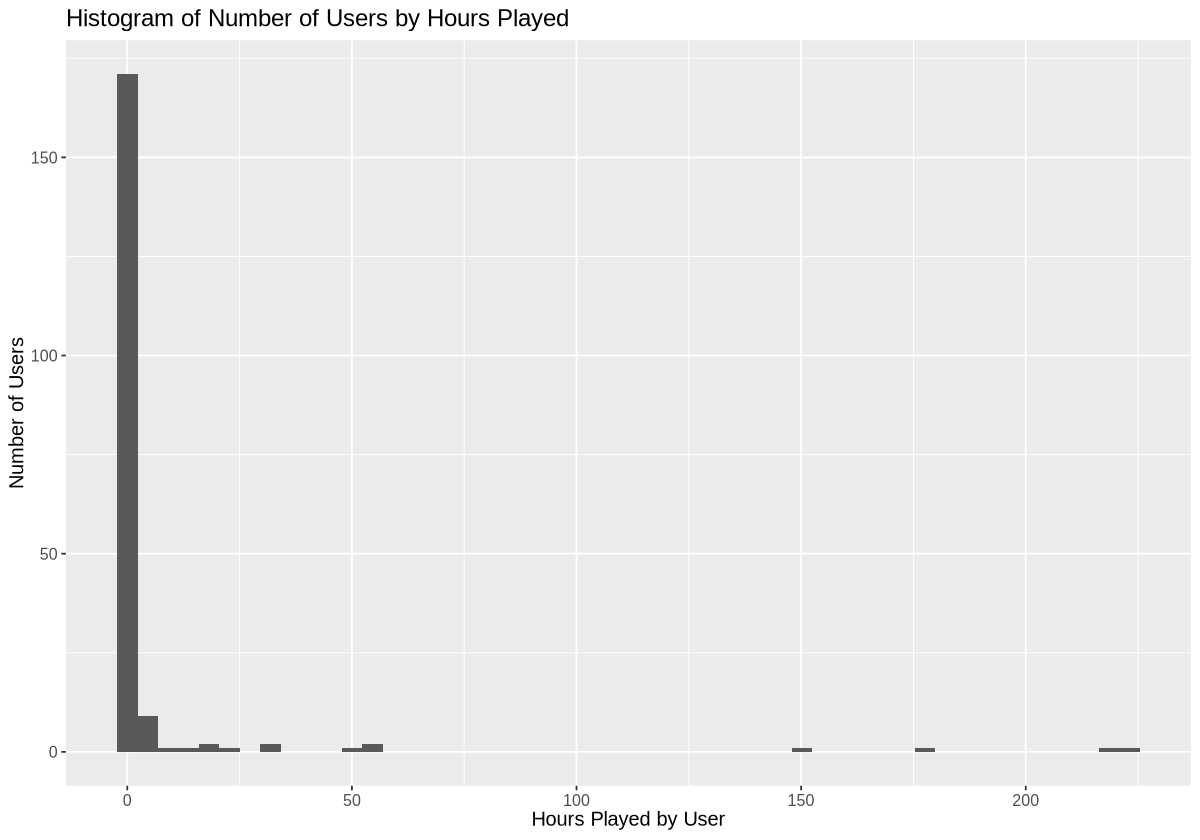

In [35]:
options(repr.plot.width = 10, repr.plot.height = 7)

played_hours_plot <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 50) +
    labs(x = "Hours Played by User", y = "Number of Users", title = "Histogram of Number of Users by Hours Played") +
    theme(text = element_text(size = 12))
played_hours_plot

Then we can create a scatter plot comparing 2 of our numerical variables (`Age` and `played_hours`) to observe if trends are clearly visible in willingess to subscribe to the newsletter.

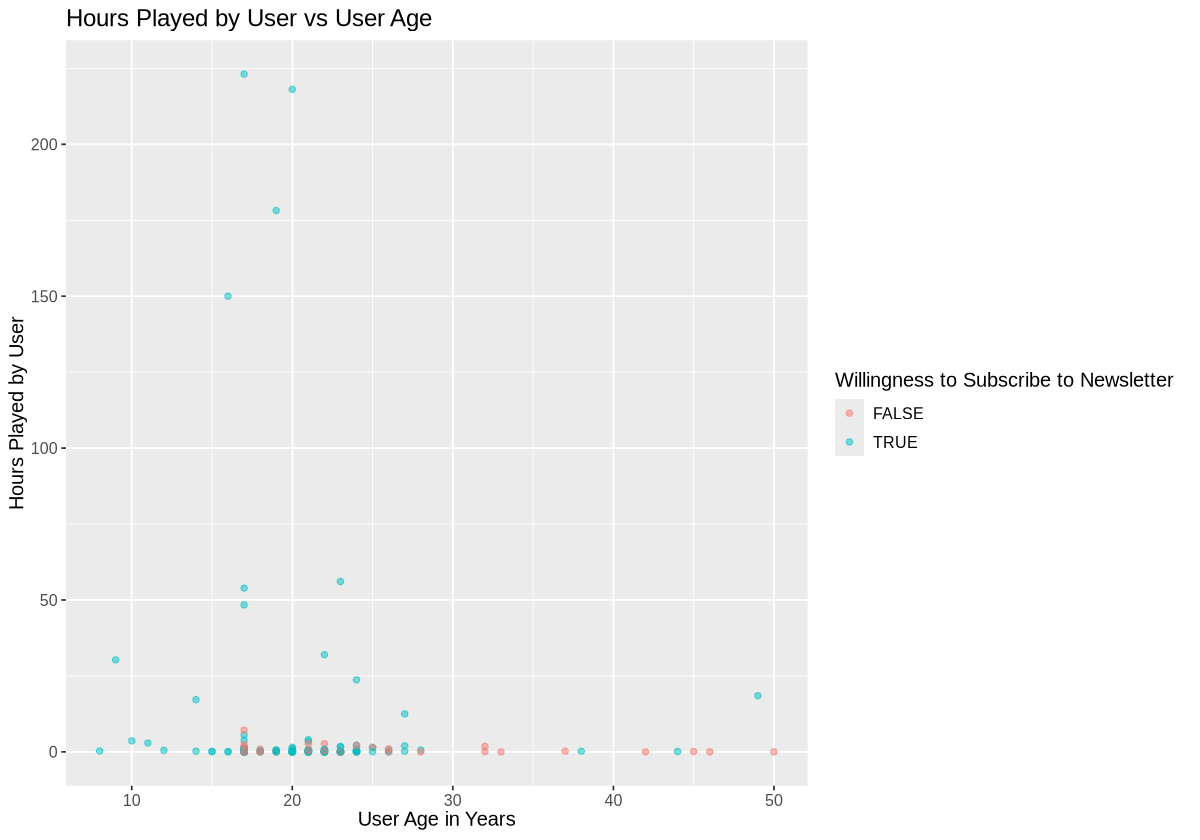

In [36]:
age_hour_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point(alpha = 0.5) +
    labs(x = "User Age in Years", y = "Hours Played by User", 
         colour = "Willingness to Subscribe to Newsletter", title = "Hours Played by User vs User Age") +
    theme(text = element_text(size = 12))
age_hour_plot

To factor in our other variable, `sessions_counted`, we can create a similar plot, comparing `sessions_count` with `played_hours` to see newsletter subscription trends.

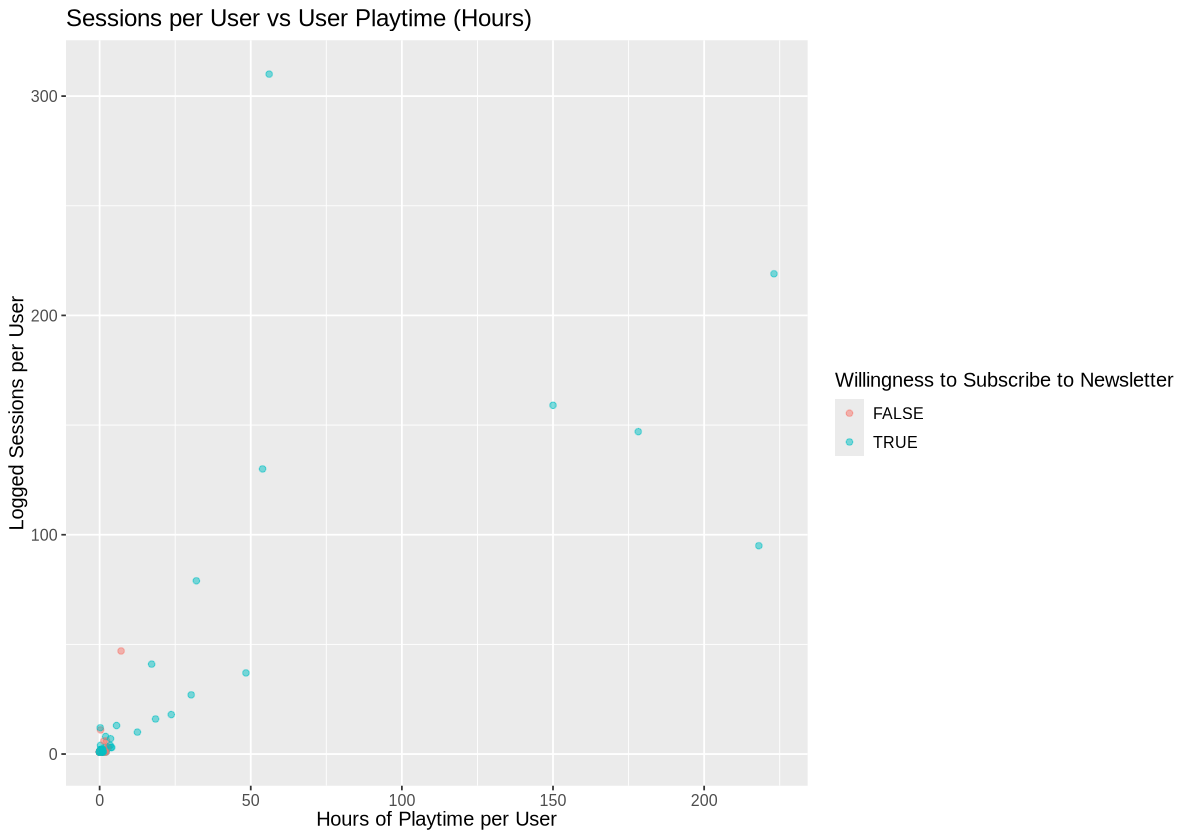

In [37]:
age_session_plot <- selected_counted |>
    ggplot(aes(x = played_hours, y = sessions_count, colour = subscribe)) +
    geom_point(alpha = 0.5) +
    labs(x = "Hours of Playtime per User", y = "Logged Sessions per User", 
         colour = "Willingness to Subscribe to Newsletter", title = "Sessions per User vs User Playtime (Hours)") +
    theme(text = element_text(size = 12))
age_session_plot

Since most of the data points are for less than 25 `played_hours`, it will be easier for analysis if we limit the x-axis to that.

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


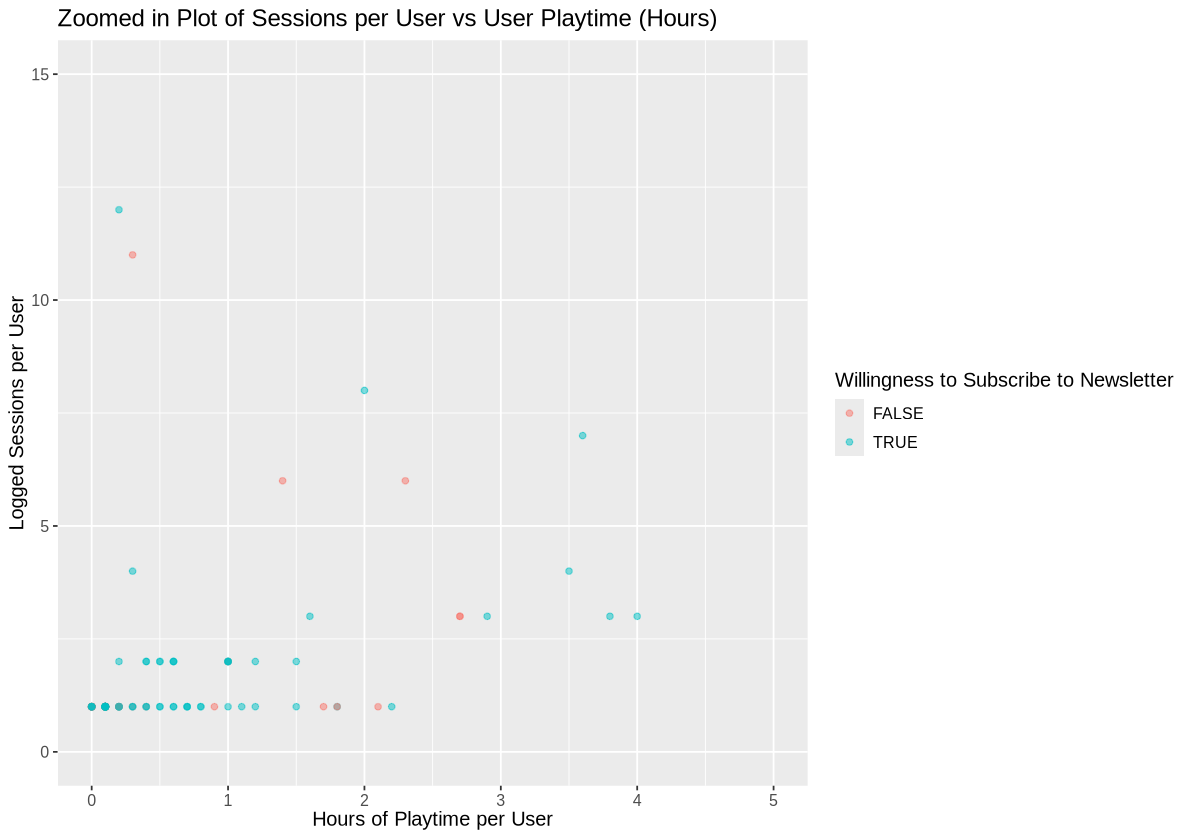

In [38]:
age_session_plot_zoomed_in <- selected_counted |>
    ggplot(aes(x = played_hours, y = sessions_count, colour = subscribe)) +
    geom_point(alpha = 0.5) +
    labs(x = "Hours of Playtime per User", y = "Logged Sessions per User", 
         colour = "Willingness to Subscribe to Newsletter", title = "Zoomed in Plot of Sessions per User vs User Playtime (Hours)") +
    theme(text = element_text(size = 12)) +
    xlim(c(0,5)) +
    ylim(c(0, 15))
age_session_plot_zoomed_in

Now that we have looked at some exploratory visualizations, we will start to create our KNN classification for predicting whether users will subscribe to the newsletter.

In [39]:
#Splitting into testing and training set

set.seed(2025)
players_split <- initial_split(selected_counted, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)

#Summarizing data 
players_summary <- players_train %>%
                    group_by(subscribe) %>%
                    summarize(mean_played_hours = mean(played_hours), 
                              mean_Age = mean(Age, na.rm =TRUE),
                              mean_sessions = mean(sessions_count, na.rm =TRUE),
                              n_of_players = n())
players_summary

subscribe,mean_played_hours,mean_Age,mean_sessions,n_of_players
<fct>,<dbl>,<dbl>,<dbl>,<int>
FALSE,0.950000,22.20833,3.458333,24
TRUE,9.857353,20.27941,13.102941,68


From the summary of the players' data, it appears that subscribers tend to have more played hours, a higher number of playing sessions, and younger age.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4902305,5,0.07082026,Preprocessor1_Model01
2,accuracy,binary,0.4902305,5,0.07082026,Preprocessor1_Model02
3,accuracy,binary,0.5867905,5,0.07300756,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
66,accuracy,binary,0.7394909,5,0.006910322,Preprocessor1_Model66
67,accuracy,binary,0.7394909,5,0.006910322,Preprocessor1_Model67
68,accuracy,binary,0.7394909,5,0.006910322,Preprocessor1_Model68


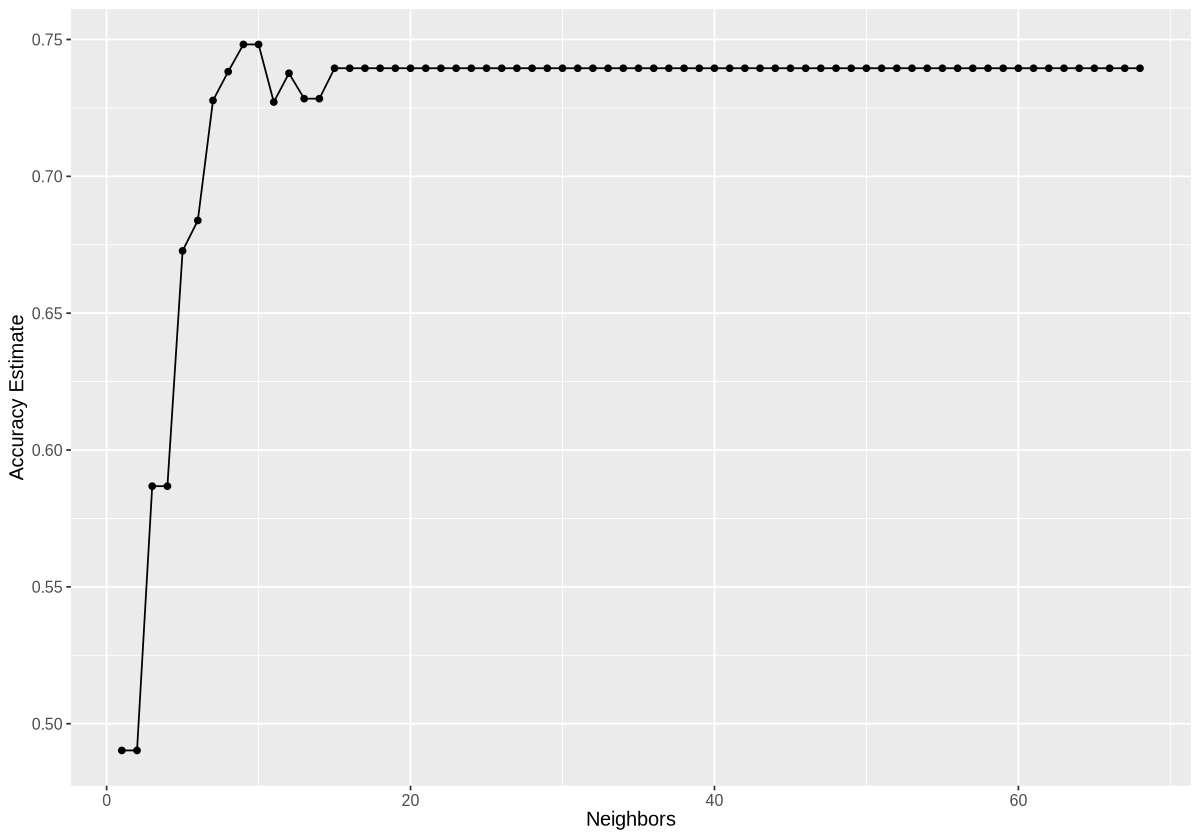

In [40]:
#Standardizing the data
set.seed(1)
players_recipe <- recipe(subscribe ~ ., data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#Training the K-nearest neighbour classifier
knn_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
                             set_engine("kknn") |> 
                             set_mode("classification")

#Cross validation 
vfold<- vfold_cv(players_train, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 68, by = 1))

#Workflow and filter for best accuracy
knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

#accuracy vs k plot
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracy_vs_k

In [41]:
#best K
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 9

In [42]:
#Knn model with best K 
players_best_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = best_k) |>
       set_engine("kknn") |>
       set_mode("classification")

players_best_fit <- workflow() |>
       add_recipe(players_recipe) |>
       add_model(players_best_spec) |>
       fit(data = players_train )
players_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.25
Best kernel: rectangular
Best k: 9

In [43]:
#Predicting on test data 
subscription_predictions <- predict(players_best_fit, players_test) |>
bind_cols(players_test)

#accuracy and confusion matrix
metrics<- subscription_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy") 

metrics

confusion <- subscription_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7419355


          Truth
Prediction FALSE TRUE
     FALSE     1    1
     TRUE      7   22

<H1>Discussion: </H1>

## Conclusions: ##
Looking at the data found above, we are unable to conclude much about which behaviours and characteristics lead to a willngness to subscribe to a newsletter at a satisfactory level of accuracy. Using the 3 numerical variables selected (`sessions_count`, `Age` and `played_hours`), the most accurate model had a roughly 74% accuracy, which is not strong enough considering predicting every user is willing to subscribe nets only a slightly lower accuracy. While there may be some trends that exist that can be seen in the exploratory visualizations (older people are less likely to subscribe, those who play more are more willing to subscribe), there is a large glut of data where the user did not play a significant amount of time and is around age 20 where the willingness to subscribe appears random by the predictors utilized. Because of this inability to properly classify the willingness to subscribe of this large portion of the dataset, it is reasonable to state that our results are inconclusive.

Nate Questions go in these boxes. 1


Nate box 2

## Future Questions: ##
While our results were inconclusive, that doesn't mean nothing can be drawn from the results. Knowing the fact that in some parts of the data there existed some small trends inspires follow-up questions such as "What makes a user unwilling to subscribe?" or "If there were a larger dataset with more varied data, could a conclusion be drawn from the same predictive variables?". Expanding the scope, one could also ponder the connection between the willingness to subscribe and other important metrics to the scope of the Minecraft Server such as willingness to support financially or likelihood of recommending the server to a friend. The inconclusive result is not a signal to end the research into the initial question, but a sign that more sub-questions need to be asked in order to answer if there exists player types that predict whether they will subscribe to the newsletter or not.